<a href="https://colab.research.google.com/github/nithin-srivatsa/Climate-Change_Analysis/blob/main/Climate_Change_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/climate_archive/GlobalLandTemperaturesByMajorCity.csv")

In [ ]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [ ]:
df.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [ ]:
df.rename(columns={'dt':'Date', 'AverageTemperature': 'Avg_Temp', 'AverageTemperatureUncertainty': 'Confidence_Interval'}, inplace= True)

We are now going to Convert the 'Date' column to a datetime data type and set it as the index

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace= True)
df.index

DatetimeIndex(['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01',
               '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01',
               '1849-09-01', '1849-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=239177, freq=None)

In [ ]:
latest_df= df[['Country', 'Avg_Temp']].groupby(['Country']).mean().sort_values('Avg_Temp')
latest_df.head(10)

,Avg_Temp
Country,
Russia,3.958878
Canada,5.109462
Chile,5.692277
Ukraine,7.041033
Germany,8.916234
United Kingdom,9.459038
France,10.402644
South Korea,10.681885
United States,11.257246


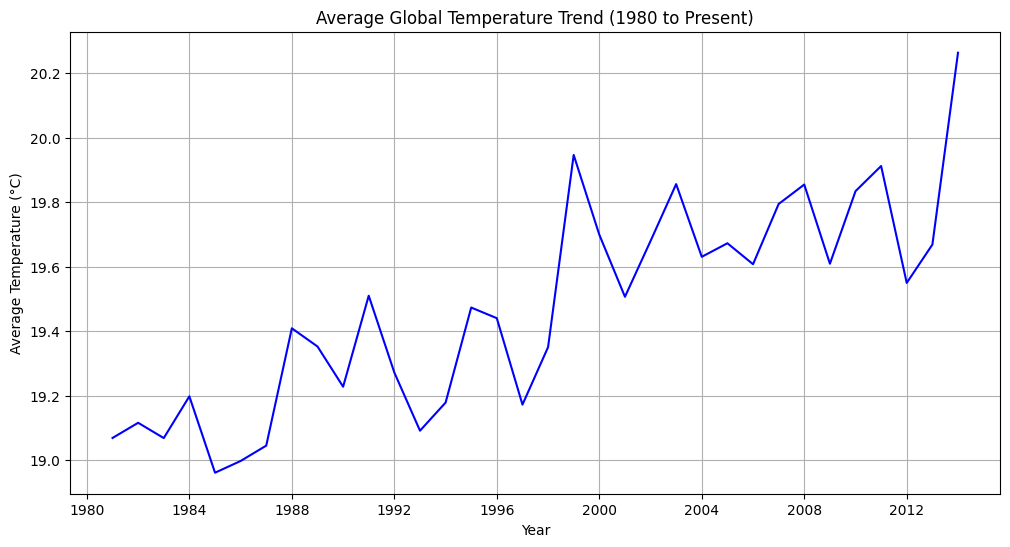

In [ ]:
# Filter data for the desired time period (from 1980 to the current date)
df_1980_to_now = df['1980':]

# Calculate the annual average temperature
annual_avg_temp = df_1980_to_now['Avg_Temp'].resample('Y').mean()

# Plot the annual average temperature
plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temp.index, annual_avg_temp, color='blue')
plt.title('Average Global Temperature Trend (1980 to Present)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

**Function Used:** seasonal_decompose from the statsmodels.tsa.seasonal library.

**Purpose:** Seasonal decomposition is a powerful technique to break down time series data into its trend, seasonality, and residual components. It helps to understand long-term trends and recurring patterns, making it essential for climate data analysis, economic forecasting, and many other time-dependent applications.

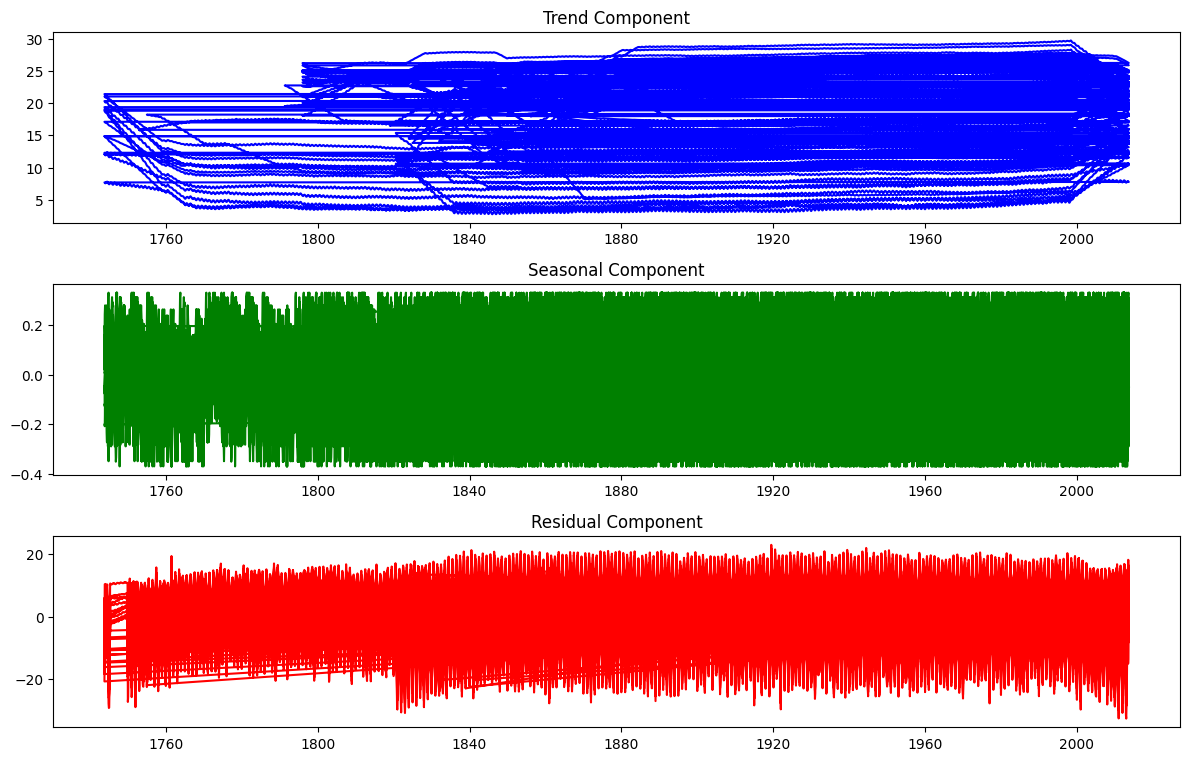

In [ ]:
# Fill missing values in the 'Avg_Temp' column with the mean temperature
df['Avg_Temp'].fillna(df['Avg_Temp'].mean(), inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Avg_Temp'], model='additive', period=365)

# Create subplots for the components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend Component')
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.subplot(413)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.tight_layout()
plt.show()